In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import string
import math

In [ ]:
# Load data
data_fake = pd.read_csv("/content/drive/MyDrive/nlp_dataset/ta_fake.csv")
data_true = pd.read_csv("/content/drive/MyDrive/nlp_dataset/ta_true.csv")

In [ ]:
data_true.head()

,text,label
0,"நாங்கள் எவர் மீதும் வெறுப்பை காட்டவில்லை, யாரை...",1
1,நபார்டு வங்கி மற்றும் ஆசிய-பசிபிக் கிராமப்புற ...,1
2,விவசாயத்தை வியாபாரமாக நடத்த வேண்டும்: மைக்ரோசா...,1
3,எனவே வேலைக்கேற்ற ஆட்களைப் பார்த்துப் பார்த்துப...,1
4,கடந்த 20-ம் தேதி அமெரிக்க அதிப ராக பொறுப்பேற்ற...,1


In [ ]:
data_fake.head()

,text,label
0,ஆலங்கட்டி மழை பெய்தது திருத்தணியா… கொடைக்கானலா...,0
1,தூத்துக்குடியில் போலீசார் துப்பாக்கியால் சுடும...,0
2,பெண்கள் கால் மேல் கால் போட்டு அமர்ந்தால் கர்ப்...,0
3,பெரிய வீட்டுப் பிள்ளைகள் தப்பு செய்வது சகஜம் எ...,0
4,குடியுரிமை திருத்தச் சட்டத்தை எதிர்ப்பவர்களை ந...,0


In [ ]:
data_fake.shape, data_true.shape

((3086, 2), (3195, 2))

In [ ]:
data_merge = pd.concat([data_fake, data_true], axis=0)

In [ ]:
data= data_merge

In [ ]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
# Shuffle data
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)

In [ ]:
# Shuffle data
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)

In [ ]:
data.head()

,text,label
0,எச்.ராஜா எஸ்.வி.சேகர் கோஷ்டி மோதல் பரபரப்பை ஏற...,0
1,"அதனைத் தொடர்ந்து ""மேடையில் இருப்பவர்கள் என்னை ...",1
2,அர்ஜூன் சம்பத் சகோதரர் பாலியல் தொழில் செய்ததால...,0
3,"இப்போது, 'இறுதிச்சுற்று' படத்துக்கு நல்ல வரவேற...",1
4,கத்தார் ஏர்வேஸ் தலைமைச் செயல் அதிகாரியின் பதில...,0


In [ ]:
def wordopt(News):
    News = News.lower()
    News = re.sub('\[.*?\]', '', News)
    #News = re.sub("\\W", " ", News)
    News = re.sub('https?://\S+|www\.\S+', '', News)
    News = re.sub('<.*?>+', '', News)
    News = re.sub('[%s]' % re.escape(string.punctuation), '', News)
    News = re.sub('\n', '', News)
    #News = re.sub('\w*\d\w*', '', News)
    return News

In [ ]:
data['text'] = data['text'].apply(wordopt)

In [ ]:
data.head()

,text,label
0,எச்ராஜா எஸ்விசேகர் கோஷ்டி மோதல் பரபரப்பை ஏற்பட...,0
1,அதனைத் தொடர்ந்து மேடையில் இருப்பவர்கள் என்னை ம...,1
2,அர்ஜூன் சம்பத் சகோதரர் பாலியல் தொழில் செய்ததால...,0
3,இப்போது இறுதிச்சுற்று படத்துக்கு நல்ல வரவேற்பு...,1
4,கத்தார் ஏர்வேஸ் தலைமைச் செயல் அதிகாரியின் பதில...,0


In [ ]:
x = data['text']
y = data['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# Custom TF-IDF Implementation
def calculate_tf(text):
    words = text.split()
    word_count = len(words)
    tf_dict = {}
    for word in words:
        tf_dict[word] = tf_dict.get(word, 0) + 1 / word_count
    return tf_dict

def calculate_idf(corpus):
    idf_dict = {}
    N = len(corpus)
    for document in corpus:
        words = set(document.split())
        for word in words:
            idf_dict[word] = idf_dict.get(word, 0) + 1
    for word, val in idf_dict.items():
        idf_dict[word] = math.log(N / val)
    return idf_dict

def transform_tfidf(corpus, idf_dict):
    tfidf_matrix = []
    for document in corpus:
        tfidf = {}
        tf = calculate_tf(document)
        for word, tf_val in tf.items():
            tfidf[word] = tf_val * idf_dict.get(word, 0)
        tfidf_matrix.append(tfidf)
    return tfidf_matrix

In [ ]:
# TF-IDF Implementation
corpus = x_train.tolist()
idf_dict = calculate_idf(corpus)
xv_train_tfidf = transform_tfidf(corpus, idf_dict)
xv_test_tfidf = transform_tfidf(x_test.tolist(), idf_dict)

In [ ]:
# Function to create vocabulary
def create_vocabulary(documents):
    vocabulary = set()
    for document in documents:
        vocabulary.update(document.split())
    return list(vocabulary)

# Function to represent documents as Bag of Words (BoW) vectors
def bow_representation(documents, vocabulary):
    bow_matrix = []
    for document in documents:
        word_counts = {}
        for word in document.split():
            word_counts[word] = word_counts.get(word, 0) + 1
        bow_vector = [word_counts.get(word, 0) for word in vocabulary]
        bow_matrix.append(bow_vector)
    return bow_matrix


In [ ]:
# Bag of Words (BoW)
vocabulary = create_vocabulary(x_train)
x_train_bow = bow_representation(x_train, vocabulary)
x_test_bow = bow_representation(x_test, vocabulary)

In [ ]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer(sparse=False)
xv_train_tfidf_array = vectorizer.fit_transform(xv_train_tfidf)
xv_test_tfidf_array = vectorizer.transform(xv_test_tfidf)

In [ ]:
# Model Training and Evaluation with Cross-Validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Logistic Regression with TF-IDF
LR_tfidf = LogisticRegression()
LR_tfidf_scores = cross_val_score(LR_tfidf, xv_train_tfidf_array, y_train, cv=5)
print("Logistic Regression with TF-IDF Cross-Validation Scores:", LR_tfidf_scores)
LR_tfidf.fit(xv_train_tfidf_array, y_train)
pred_lr_tfidf = LR_tfidf.predict(xv_test_tfidf_array)
accuracy_lr_tfidf = accuracy_score(y_test, pred_lr_tfidf)
print("Logistic Regression with TF-IDF Accuracy:", accuracy_lr_tfidf)
print(classification_report(y_test, pred_lr_tfidf))

Logistic Regression with TF-IDF Cross-Validation Scores: [0.92238806 0.92139303 0.91840796 0.91442786 0.92729084]
Logistic Regression with TF-IDF Accuracy: 0.9268098647573588
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       600
           1       0.89      0.98      0.93       657

    accuracy                           0.93      1257
   macro avg       0.93      0.92      0.93      1257
weighted avg       0.93      0.93      0.93      1257



In [ ]:
# Decision Tree with TF-IDF
DT_tfidf = DecisionTreeClassifier()
DT_tfidf_scores = cross_val_score(DT_tfidf, xv_train_tfidf_array, y_train, cv=5)
print("Decision Tree with TF-IDF Cross-Validation Scores:", DT_tfidf_scores)
DT_tfidf.fit(xv_train_tfidf_array, y_train)
pred_dt_tfidf = DT_tfidf.predict(xv_test_tfidf_array)
accuracy_dt_tfidf = accuracy_score(y_test, pred_dt_tfidf)
print("Decision Tree with TF-IDF Accuracy:", accuracy_dt_tfidf)
print(classification_report(y_test, pred_dt_tfidf))

Decision Tree with TF-IDF Cross-Validation Scores: [0.85870647 0.88159204 0.84875622 0.87363184 0.87450199]
Decision Tree with TF-IDF Accuracy: 0.8798727128082736
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       600
           1       0.88      0.89      0.89       657

    accuracy                           0.88      1257
   macro avg       0.88      0.88      0.88      1257
weighted avg       0.88      0.88      0.88      1257



In [ ]:
from sklearn.feature_extraction import DictVectorizer

# Convert dictionary-based BoW representations to array-like format
vectorizer_bow = DictVectorizer(sparse=False)  # Set sparse=False to get dense matrix
xv_train_bow_array = vectorizer_bow.fit_transform(xv_train_bow)

In [ ]:
# Random Forest with TF-IDF
RF_tfidf = RandomForestClassifier(random_state=0)
RF_tfidf_scores = cross_val_score(RF_tfidf, xv_train_tfidf_array, y_train, cv=5)
print("Random Forest with TF-IDF Cross-Validation Scores:", RF_tfidf_scores)
RF_tfidf.fit(xv_train_tfidf_array, y_train)
pred_rf_tfidf = RF_tfidf.predict(xv_test_tfidf_array)
accuracy_rf_tfidf = accuracy_score(y_test, pred_rf_tfidf)
print("Random Forest with TF-IDF Accuracy:", accuracy_rf_tfidf)
print(classification_report(y_test, pred_rf_tfidf))

Random Forest with TF-IDF Cross-Validation Scores: [0.88955224 0.92338308 0.89751244 0.89552239 0.90936255]
Random Forest with TF-IDF Accuracy: 0.9077167859984089
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       600
           1       0.89      0.94      0.91       657

    accuracy                           0.91      1257
   macro avg       0.91      0.91      0.91      1257
weighted avg       0.91      0.91      0.91      1257



In [ ]:
LR_bow = LogisticRegression()
LR_bow_scores = cross_val_score(LR_bow, x_train_bow, y_train, cv=5)
print("Logistic Regression with BoW Cross-Validation Scores:", LR_bow_scores)
LR_bow.fit(x_train_bow, y_train)
pred_lr_bow = LR_bow.predict(x_test_bow)
print("bag of words logistic regression Accuracy:", accuracy_score(y_test, pred_lr_bow))
print(classification_report(y_test, pred_lr_bow))

Logistic Regression with BoW Cross-Validation Scores: [0.91343284 0.92238806 0.91840796 0.91940299 0.92828685]
bag of words logistic regression Accuracy: 0.9276054097056484
              precision    recall  f1-score   support

           0       0.92      0.94      0.92       600
           1       0.94      0.92      0.93       657

    accuracy                           0.93      1257
   macro avg       0.93      0.93      0.93      1257
weighted avg       0.93      0.93      0.93      1257



In [ ]:
DT_bow = DecisionTreeClassifier()
DT_bow_scores = cross_val_score(DT_bow, x_train_bow, y_train, cv=5)
print("Decision Tree with BoW Cross-Validation Scores:", DT_bow_scores)
DT_bow.fit(x_train_bow, y_train)
pred_dt_bow = DT_bow.predict(x_test_bow)
print("bag of words decision tree classifier Accuracy:", accuracy_score(y_test, pred_dt_bow))
print(classification_report(y_test, pred_dt_bow))

Decision Tree with BoW Cross-Validation Scores: [0.85870647 0.87761194 0.839801   0.84676617 0.84163347]
bag of words decision tree classifier Accuracy: 0.8568019093078759
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       600
           1       0.84      0.89      0.87       657

    accuracy                           0.86      1257
   macro avg       0.86      0.86      0.86      1257
weighted avg       0.86      0.86      0.86      1257



In [ ]:
RF_bow = RandomForestClassifier(random_state=0)
RF_bow_scores = cross_val_score(RF_bow, x_train_bow, y_train, cv=5)
print("Random Forest with BoW Cross-Validation Scores:", RF_bow_scores)
RF_bow.fit(x_train_bow, y_train)
pred_rf_bow = RF_bow.predict(x_test_bow)
print("bag of words Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, pred_rf_bow))
print(classification_report(y_test, pred_rf_bow))

Random Forest with BoW Cross-Validation Scores: [0.88258706 0.89552239 0.89751244 0.88855721 0.89243028]
bag of words Gradient Boosting Classifier Accuracy: 0.8949880668257757
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       600
           1       0.91      0.88      0.90       657

    accuracy                           0.89      1257
   macro avg       0.89      0.90      0.89      1257
weighted avg       0.90      0.89      0.90      1257



In [ ]:
# Output label function
def output_label(n):
    return "Fake News" if n == 0 else "Not A Fake News"

In [ ]:
def manual_testing_tfidf(news):
    new_x_test = transform_tfidf([wordopt(news)], idf_dict)
    new_x_test_array = vectorizer.transform(new_x_test)
    # Reshape the input data to 2D array
    new_x_test_array_2d = new_x_test_array.reshape(1, -1)
    pred_LR = LR_tfidf.predict(new_x_test_array_2d)
    pred_DT = DT_tfidf.predict(new_x_test_array_2d)
    pred_RF = RF_tfidf.predict(new_x_test_array_2d)

    print("\nManual Testing with TF-IDF:")
    print("LR Prediction:", output_label(pred_LR[0]))
    print("DT Prediction:", output_label(pred_DT[0]))
    print("RF Prediction:", output_label(pred_RF[0]))

In [ ]:
# Manual Testing
news = input("Enter news for manual testing: ")
manual_testing_tfidf(news)

Enter news for manual testing: பெற்றோர் அனுமதி இன்றி திருமணம் செய்தால் சொத்துரிமை இல்லை என்று உச்ச நீதிமன்றம் சொன்னதா

Manual Testing with TF-IDF:
LR Prediction: Fake News
DT Prediction: Fake News
RF Prediction: Fake News


In [ ]:
def manual_testing_bow(news):
    news = wordopt(news)
    news_bow = bow_representation([news], vocabulary)[0]
    pred_lr = LR_bow.predict([news_bow])
    pred_dt = DT_bow.predict([news_bow])
    pred_rf = RF_bow.predict([news_bow])

    print("\n\nBag of Words (BoW) Results:")
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRF Prediction: {}".format(output_label(pred_lr[0]), output_label(pred_dt[0]), output_label(pred_rf[0])))

In [ ]:
# Manual Testing
news = input("Enter news for manual testing: ")
manual_testing_bow(news)

Enter news for manual testing: பெற்றோர் அனுமதி இன்றி திருமணம் செய்தால் சொத்துரிமை இல்லை என்று உச்ச நீதிமன்றம் சொன்னதா


Bag of Words (BoW) Results:


LR Prediction: Fake News 
DT Prediction: Fake News 
RF Prediction: Fake News


DL PART

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load data
data_fake = pd.read_csv("/content/drive/MyDrive/nlp_dataset/ta_fake.csv")
data_true = pd.read_csv("/content/drive/MyDrive/nlp_dataset/ta_true.csv")

In [ ]:
data_fake.columns

Index(['text', 'label'], dtype='object')

In [ ]:
Newss = ''.join(data_fake['text'].tolist())

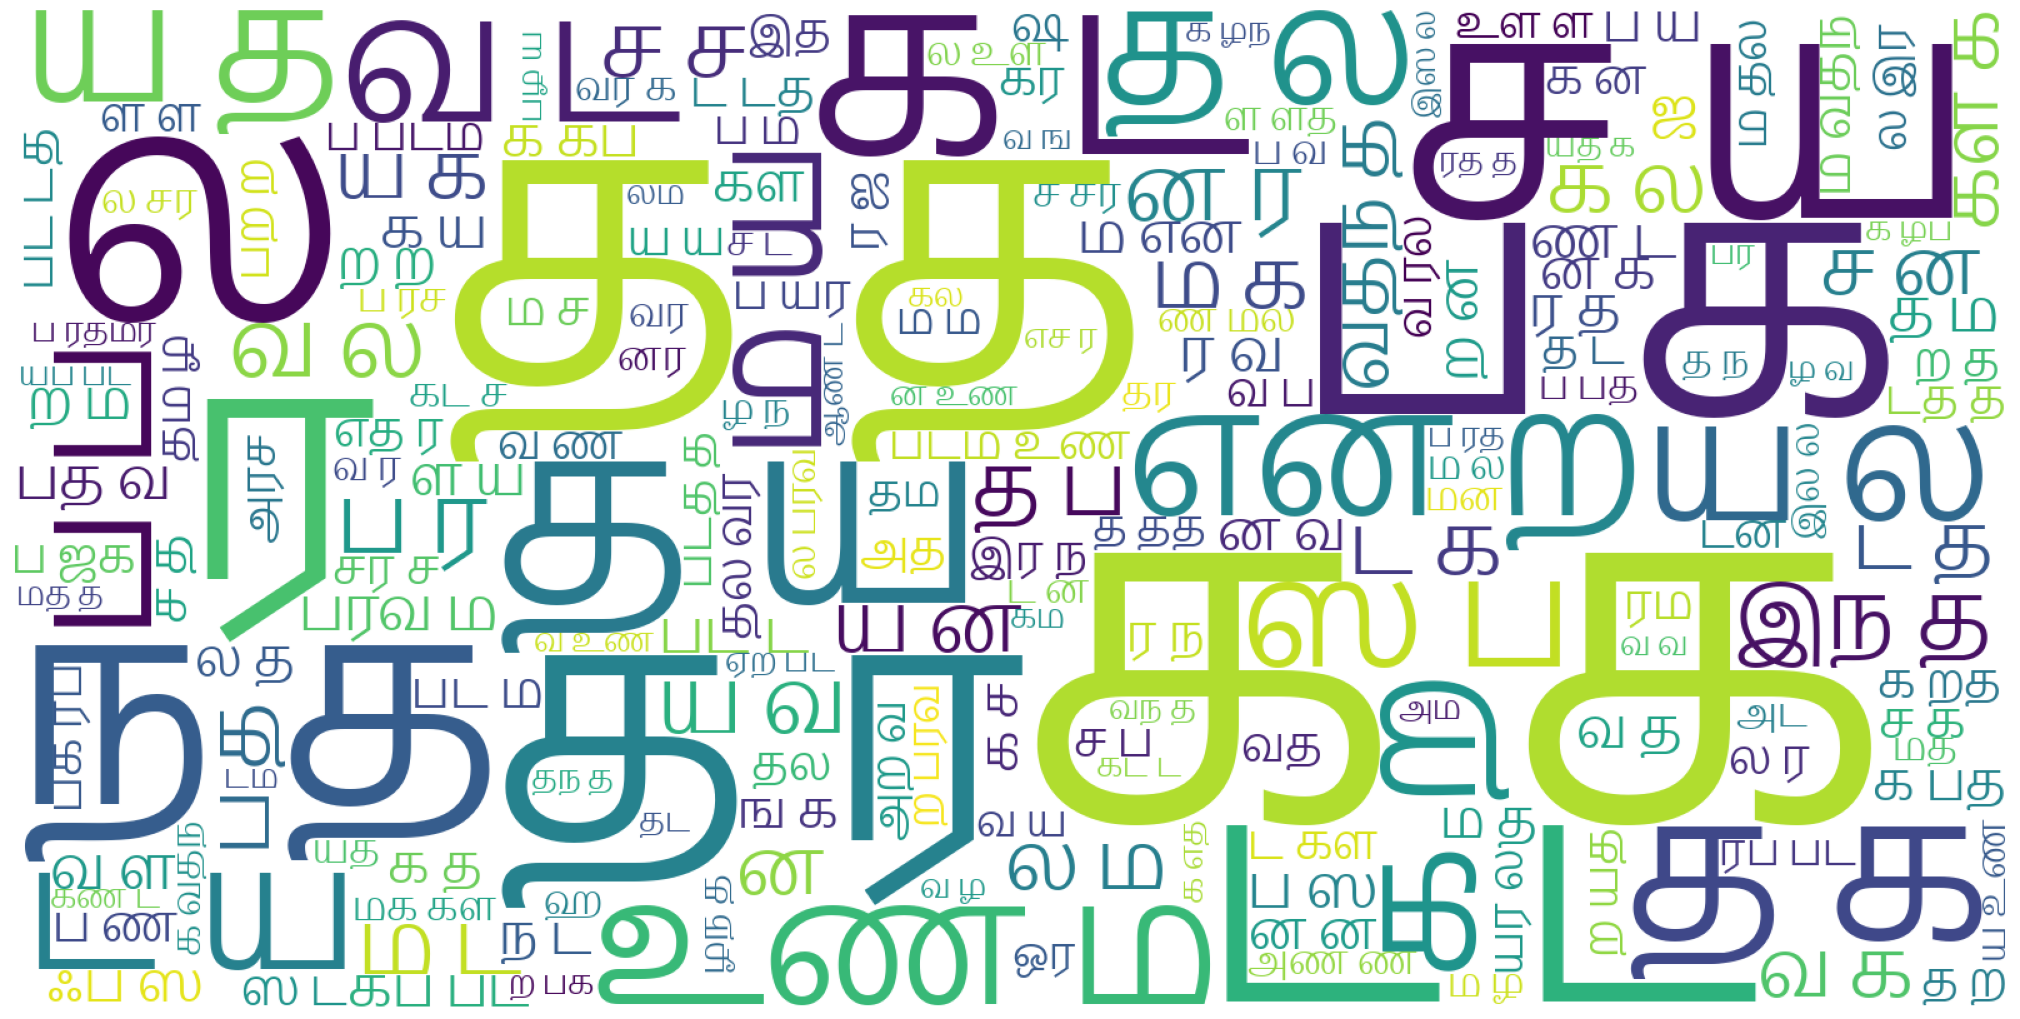

In [ ]:
wordcloud = WordCloud(width=1600, height=800, background_color='white',font_path="/content/drive/MyDrive/nlp_dataset/Nirmala.ttf").generate(Newss)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
NewsR = ''.join(data_true['text'].tolist())

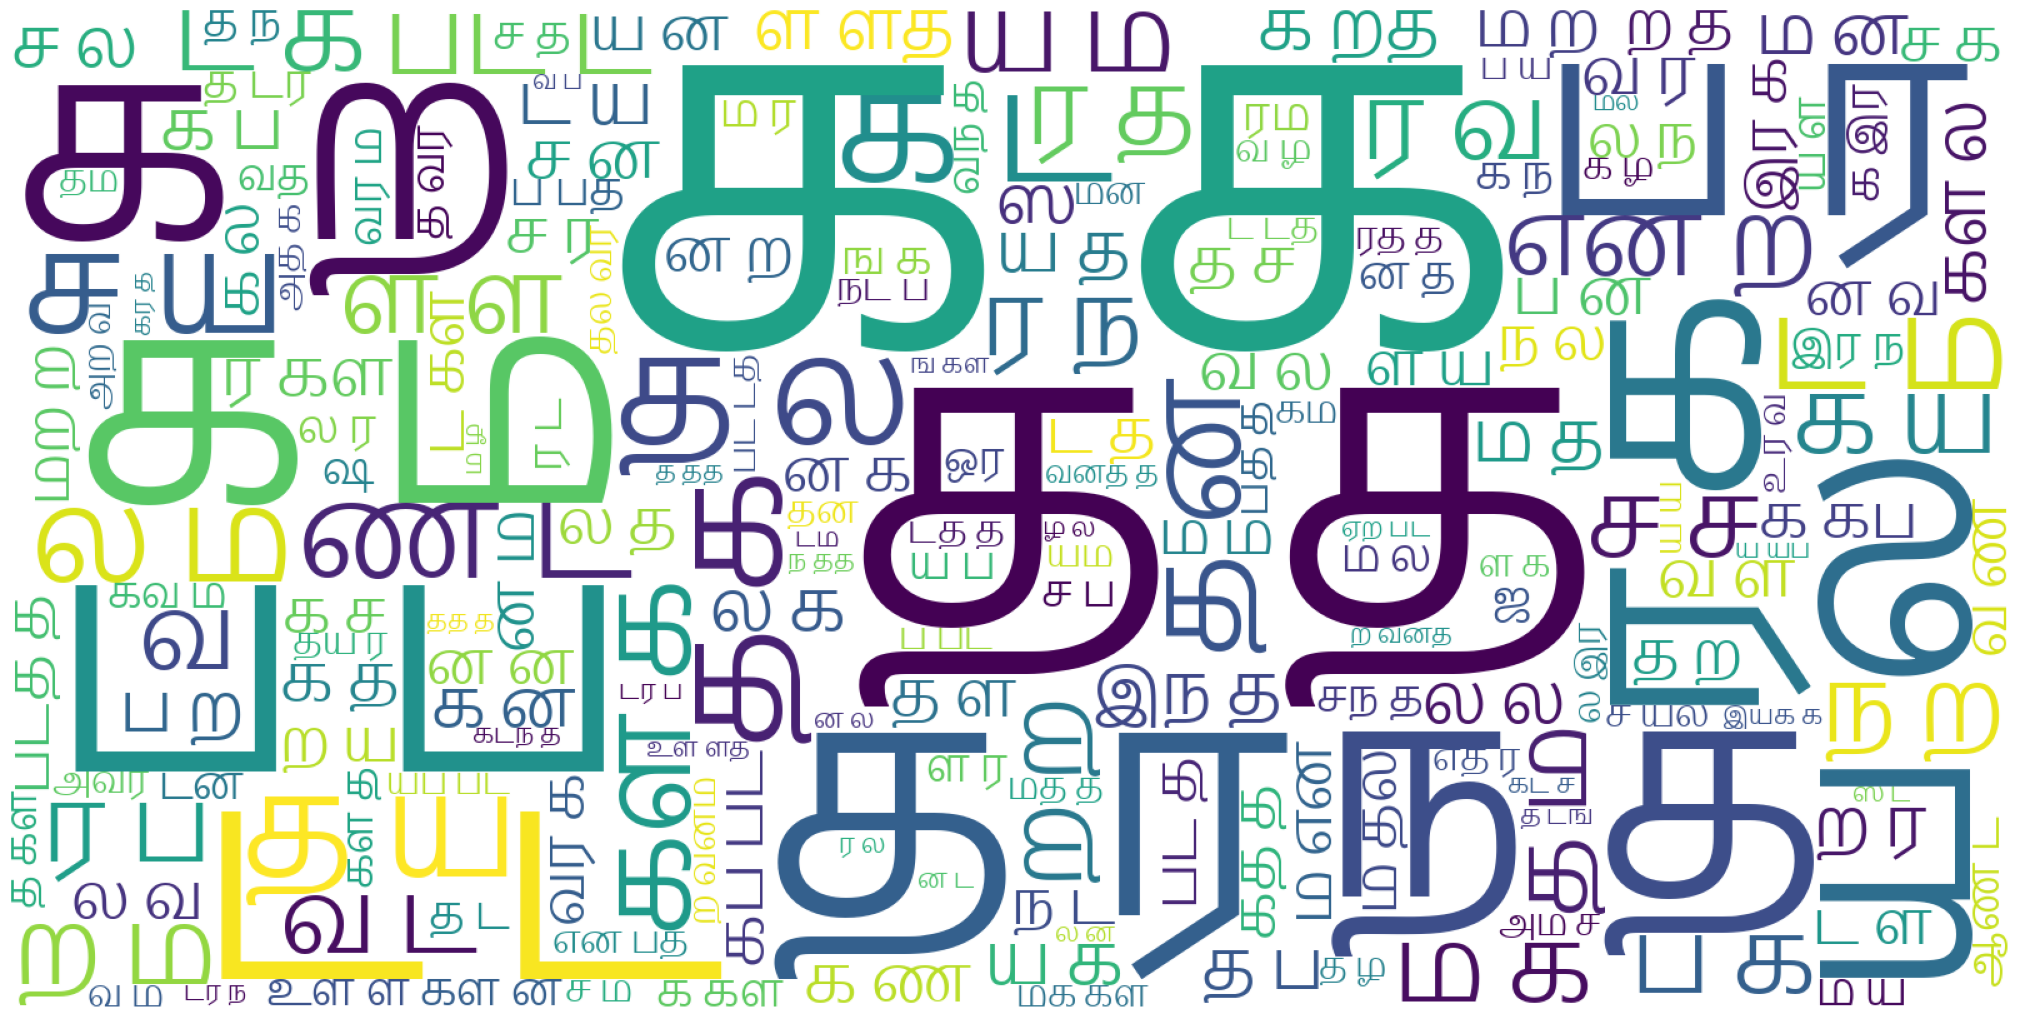

In [ ]:
wordcloud = WordCloud(width=1600, height=800, background_color='white',font_path="/content/drive/MyDrive/nlp_dataset/Nirmala.ttf").generate(NewsR)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data = pd.concat([data_true, data_fake], ignore_index=True)

In [ ]:
data.sample(5)

,text,label
2978,இந்த விண்கலத்திற்கான 4 டிக்கெட்களை வாங்கிய அமெ...,1
3181,கோவிட் நெறிமுறைகளை காரணம் காட்டி மகாராஷ்டிராவி...,1
5675,தண்ணீர்முக்கம் பண்ட் புதிய பாலத்தின் கான்கிரீட...,0
865,"வயிறு நிறைய உண்டால், தூக்கம் கண்ணைச் சுழற்றும்...",1
3582,டெல்லி இந்தியா கேட்டில் 61 ஆயிரம் இஸ்லாமிய ராண...,0


In [ ]:
data.shape

(6281, 2)

In [ ]:
def wordopt(News):
    News = News.lower()
    News = re.sub('\[.*?\]', '', News)
    #News = re.sub("\\W", " ", News)
    News = re.sub('https?://\S+|www\.\S+', '', News)
    News = re.sub('<.*?>+', '', News)
    #News = re.sub('[%s]' % re.escape(string.punctuation), '', News)
    News = re.sub('\n', '', News)
    News = re.sub('\w*\d\w*', '', News)
    return News

In [ ]:
data['text'] = data['text'].apply(wordopt)

In [ ]:
data.head()

,text,label
0,"நாங்கள் எவர் மீதும் வெறுப்பை காட்டவில்லை, யாரை...",1
1,நபார்டு வங்கி மற்றும் ஆசிய-பசிபிக் கிராமப்புற ...,1
2,விவசாயத்தை வியாபாரமாக நடத்த வேண்டும்: மைக்ரோசா...,1
3,எனவே வேலைக்கேற்ற ஆட்களைப் பார்த்துப் பார்த்துப...,1
4,கடந்த -ம் தேதி அமெரிக்க அதிப ராக பொறுப்பேற்ற ட...,1


In [ ]:
import gensim

In [ ]:
y = data['label'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
type(X[0])

list

In [ ]:
print(X[0])

['நாங்கள்', 'எவர்', 'மீதும்', 'வெறுப்பை', 'காட்டவில்லை,', 'யாரையும்', 'தூண்டிவிடவில்லை.', 'என்ன', 'உணவை', 'சாப்பிட்டாலும்,', 'எதை', 'அணிந்திருந்தாலும்', 'ஏற்றுக்', 'கொள்கிறோம்', 'என்று', 'மோகன்', 'பாகவத்', 'கூறியிருக்கிறார்.', 'மத', 'நம்பிக்கை', 'என்கிற', 'வகையில்', 'உணவு', 'மற்றும்', 'ஆடைக்', 'கட்டுப்பாடுகளை', 'நாங்கள்', 'விதிக்கவில்லை', 'என்று', 'பேசியதாக', 'தகவல்கள்', 'வெளியாகியுள்ளன.']


In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.key_to_index)

27160

In [ ]:
w2v_model.wv.key_to_index

{'என்று': 0,
 'இந்த': 1,
 'உண்மையா': 2,
 'மற்றும்': 3,
 'என': 4,
 'ஒரு': 5,
 'பரவும்': 6,
 'அரசு': 7,
 'இது': 8,
 'வதந்தி': 9,
 'பேஸ்புக்': 10,
 'பதிவு': 11,
 'படம்': 12,
 'வீடியோ': 13,
 'உண்மை': 14,
 'ஃபேஸ்புக்': 15,
 'என்ற': 16,
 'கூறினாரா': 17,
 'உள்ள': 18,
 'முதல்': 19,
 'மத்திய': 20,
 'இருந்து': 21,
 'வேண்டும்': 22,
 'செய்தி': 23,
 'கொரோனா': 24,
 '்': 25,
 'மோடி': 26,
 'பாஜக': 27,
 'நிறுவனம்': 28,
 'என்ன': 29,
 '-ம்': 30,
 'இந்திய': 31,
 'ஆண்டு': 32,
 'அவர்': 33,
 'புதிய': 34,
 'தலைவர்': 35,
 'வரும்': 36,
 'பெயரில்': 37,
 'கடந்த': 38,
 'சென்னை': 39,
 'தற்போது': 40,
 'மக்கள்': 41,
 'தனது': 42,
 'அந்த': 43,
 'அமைச்சர்': 44,
 'கோடி': 45,
 'சில': 46,
 'என்பது': 47,
 'தகவல்': 48,
 'புகைப்படம்': 49,
 'தொடர்ந்து': 50,
 'ஆனால்': 51,
 'செய்து': 52,
 'வரை': 53,
 'தேதி': 54,
 'இருக்கும்': 55,
 'மீது': 56,
 'வைரல்': 57,
 'மூலம்': 58,
 'குறித்து': 59,
 'பகிரப்படும்': 60,
 'கொண்டு': 61,
 'பெண்': 62,
 'பல': 63,
 'பற்றி': 64,
 'தமிழ்': 65,
 'நிறுவனத்தின்': 66,
 'நடிகர்': 67,
 'லட்சம்': 68,
 'செய்

In [ ]:
w2v_model.wv["ஒருவரை"]

array([-1.23345875e-03,  1.10840704e-02,  7.00184051e-03,  8.86580092e-04,
        4.93136561e-03, -5.87192178e-03,  1.12493197e-02,  5.88547112e-03,
        8.52517551e-04, -1.03569645e-02,  5.12007042e-04, -1.12423562e-02,
        3.08925286e-03,  3.34142381e-03,  1.50705420e-03,  5.75418724e-03,
       -3.38783814e-03, -8.23439565e-03, -2.77699460e-03, -6.28706859e-03,
        1.01217683e-02, -3.08046862e-03,  1.18984040e-02,  5.87748596e-03,
       -3.68979666e-03,  1.04885660e-02, -1.26332149e-03, -1.41023267e-02,
       -1.47576844e-02, -5.50831994e-03,  9.93055757e-04,  2.63899892e-05,
        1.79525069e-03, -1.76888201e-02, -4.51692101e-03,  9.13948345e-04,
        6.55571930e-03, -6.80203957e-04, -3.09195975e-03, -1.81133915e-02,
        1.26874242e-02, -2.52456317e-04, -3.58793535e-03, -8.70819110e-03,
        4.87814797e-03, -3.43466736e-03,  2.35041929e-03, -8.36576056e-03,
       -2.73357448e-03, -8.25524563e-04, -2.85411812e-03,  4.15037153e-03,
       -1.39830112e-02,  

In [ ]:
w2v_model.wv.most_similar("முதல்")

[('மற்றும்', 0.9906299114227295),
 ('இந்த', 0.9897709488868713),
 ('ஒரு', 0.9891620874404907),
 ('என', 0.9884765148162842),
 ('உள்ள', 0.9881922602653503),
 ('அரசு', 0.9877265095710754),
 ('என்று', 0.9877150058746338),
 ('இது', 0.9875545501708984),
 ('இருந்து', 0.9875249266624451),
 ('நிறுவனம்', 0.9874038696289062)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
X

[[766,
  9092,
  2780,
  9093,
  9094,
  3630,
  9095,
  30,
  5228,
  9096,
  2246,
  9097,
  2781,
  9098,
  1,
  767,
  9099,
  5229,
  922,
  714,
  715,
  116,
  518,
  4,
  9100,
  2782,
  766,
  9101,
  1,
  2783,
  281,
  2784],
 [9102,
  156,
  4,
  9103,
  5230,
  4,
  3631,
  148,
  768,
  9104,
  355,
  836,
  2785,
  1012,
  1253,
  309,
  1592,
  1864,
  558,
  34,
  81,
  5231],
 [5232, 5233, 769, 5234, 3632, 36, 5235, 310],
 [311,
  9105,
  9106,
  2786,
  2786,
  9107,
  9108,
  9109,
  162,
  9110,
  9111,
  9112,
  3633,
  9113,
  9114,
  3634,
  48,
  653,
  9115,
  3635,
  9116,
  1865,
  9117,
  3636,
  1404,
  356,
  3637,
  9118,
  9119,
  257,
  1405,
  9120],
 [39,
  31,
  55,
  188,
  9121,
  9122,
  3638,
  9123,
  9124,
  42,
  134,
  3639,
  3640,
  559,
  770,
  599,
  258,
  208,
  188,
  3641,
  9125,
  1866,
  9126,
  95,
  3642,
  9127,
  2,
  9128,
  5236,
  2247,
  1867,
  1,
  9129],
 [332, 357, 9130, 9131, 9132, 1868],
 [1254,
  123,
  116,
  60,


In [ ]:
tokenizer.word_index

{'என்று': 1,
 'இந்த': 2,
 'உண்மையா': 3,
 'மற்றும்': 4,
 'என': 5,
 'ஒரு': 6,
 'பரவும்': 7,
 'அரசு': 8,
 'இது': 9,
 'வதந்தி': 10,
 'பேஸ்புக்': 11,
 'பதிவு': 12,
 'படம்': 13,
 'வீடியோ': 14,
 'உண்மை': 15,
 'ஃபேஸ்புக்': 16,
 'என்ற': 17,
 'கூறினாரா': 18,
 'உள்ள': 19,
 'முதல்': 20,
 'மத்திய': 21,
 'இருந்து': 22,
 'வேண்டும்': 23,
 'செய்தி': 24,
 'கொரோனா': 25,
 '்': 26,
 'மோடி': 27,
 'பாஜக': 28,
 'நிறுவனம்': 29,
 'என்ன': 30,
 '-ம்': 31,
 'இந்திய': 32,
 'ஆண்டு': 33,
 'அவர்': 34,
 'புதிய': 35,
 'தலைவர்': 36,
 'வரும்': 37,
 'பெயரில்': 38,
 'கடந்த': 39,
 'சென்னை': 40,
 'தற்போது': 41,
 'தனது': 42,
 'மக்கள்': 43,
 'அந்த': 44,
 'கோடி': 45,
 'சில': 46,
 'அமைச்சர்': 47,
 'என்பது': 48,
 'தகவல்': 49,
 'புகைப்படம்': 50,
 'தொடர்ந்து': 51,
 'வரை': 52,
 'ஆனால்': 53,
 'செய்து': 54,
 'தேதி': 55,
 'மீது': 56,
 'இருக்கும்': 57,
 'வைரல்': 58,
 'மூலம்': 59,
 'கொண்டு': 60,
 'குறித்து': 61,
 'பெண்': 62,
 'பகிரப்படும்': 63,
 'பல': 64,
 'நிறுவனத்தின்': 65,
 'பற்றி': 66,
 'தமிழ்': 67,
 'லட்சம்': 68,
 'செய்ய': 69,
 'இந்த

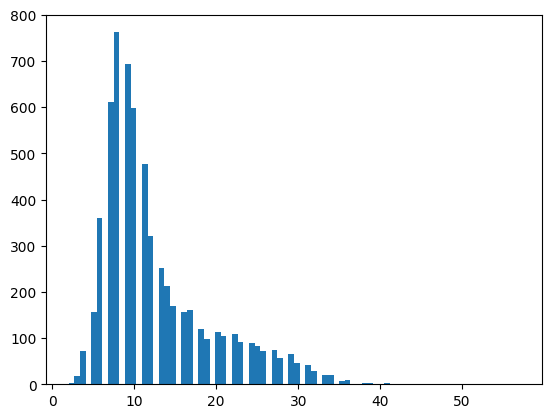

In [ ]:
plt.hist([len(x) for x in X], bins=80)
plt.show()

In [ ]:
maxlen = 33
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[100])

33

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))

    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]

    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(27161, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 100)           2716100   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2833477 (10.81 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 2716100 (10.36 MB)
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.25, epochs = 20)

Epoch 1/20
111/111 [==============================] - 5s 13ms/step - loss: 0.4945 - acc: 0.7540 - val_loss: 0.4219 - val_acc: 0.7699
Epoch 2/20
111/111 [==============================] - 1s 9ms/step - loss: 0.3928 - acc: 0.8092 - val_loss: 0.3745 - val_acc: 0.8149
Epoch 3/20
111/111 [==============================] - 1s 8ms/step - loss: 0.3700 - acc: 0.8233 - val_loss: 0.3640 - val_acc: 0.8175
Epoch 4/20
111/111 [==============================] - 1s 8ms/step - loss: 0.3566 - acc: 0.8262 - val_loss: 0.3956 - val_acc: 0.7929
Epoch 5/20
111/111 [==============================] - 1s 7ms/step - loss: 0.3470 - acc: 0.8318 - val_loss: 0.3978 - val_acc: 0.7886
Epoch 6/20
111/111 [==============================] - 1s 6ms/step - loss: 0.3372 - acc: 0.8423 - val_loss: 0.3492 - val_acc: 0.8311
Epoch 7/20
111/111 [==============================] - 1s 6ms/step - loss: 0.3276 - acc: 0.8403 - val_loss: 0.3302 - val_acc: 0.8353
Epoch 8/20
111/111 [==============================] - 1s 6ms/step - loss: 0

In [ ]:
y_pred = (model.predict(X_test)>=0.5).astype(int)

50/50 [==============================] - 0s 2ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.8688733290897518

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.87       792
           1       0.90      0.83      0.86       779

    accuracy                           0.87      1571
   macro avg       0.87      0.87      0.87      1571
weighted avg       0.87      0.87      0.87      1571



In [ ]:
x = ["அதேபோல தியேட்டர்கள் திறப்பு தொடர்பாக இதுவரை எதுவும் பேசாமல் இருந்த விஜய் இப்போது தன்னுடைய படம் ரிலீஸாகிறது என்றதும் தன்னுடைய படத்தை ஓட வைப்பதற்காகவும் வசூலை எடுப்பதற்காகவும் முதல்வரை சந்தித்து பேசியிருக்கிறாரே இது சரியா"]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
(model.predict(x)>=0.5).astype(int)

1/1 [==============================] - 0s 20ms/step


array([[1]])

In [ ]:
x = ["கோவை குடிநீர் கோவிந்தா சர்ச்சையை கிளப்பும் பேஸ்புக் பதிவு"]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
(model.predict(x)>=0.5).astype(int)

1/1 [==============================] - 0s 19ms/step


array([[0]])